In [1]:
import sys
sys.path.append('../my_modules/')
from igraph_method_wrappers import scan_k_in_vals

import igraph 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Run test

In [ ]:
N=33 # number of k_in values
M=10 # repetition number

GN=igraph.Graph.community_edge_betweenness
N_fast=igraph.Graph.community_fastgreedy

GN_res,krange=scan_k_in_vals(GN,N=N,M=M)
N_fast_res,krange=scan_k_in_vals(N_fast,N=N,M=M)

### Plot the mean results

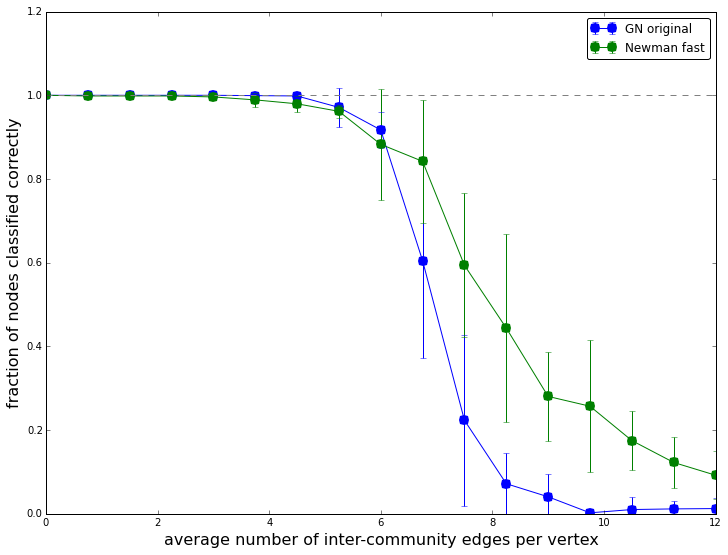

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.errorbar(16-krange,np.mean(GN_res,axis=1),np.std(GN_res,axis=1),
            marker='o',c='blue',ms=10,mec='none',label='GN original')
ax.errorbar(16-krange,np.mean(N_fast_res,axis=1),np.std(N_fast_res,axis=1),
            marker='o',c='green',ms=10,mec='none',label='Newman fast')
ax.axhline(1,linestyle='dashed',color='grey')
ax.set_ylim(0,1.2)
ax.legend(loc='best',fancybox=True)
ax.set_xlabel('average number of inter-community edges per vertex',fontsize=16)
dump=ax.set_ylabel('fraction of nodes classified correctly',fontsize=16)
fig.savefig('gn_nfast_comp_12_30.png')

#### Notes
- Interestingly Newman's fast algorithm detects larger fraction of nodes classified correctly even if there is absolutely nothing to be found :). At k_out=12 the probability of creating intra and inter-community edges are around equal so there are no real  clusters in the graph.